In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("C:/Users/abhin/OneDrive/Documents/Scrap/data_clean.csv")
data.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S


In [2]:
data.rename({'Solar.R' : 'Solar','Temp C':'Temp'}, axis = 1,inplace= True)
data.head()

,Unnamed: 0,Ozone,Solar,Wind,Temp,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S


In [3]:
data.columns

Index(['Unnamed: 0', 'Ozone', 'Solar', 'Wind', 'Temp', 'Month', 'Day', 'Year',
       'Temp', 'Weather'],
      dtype='object')

In [4]:
data = data.drop(['Unnamed: 0'], axis = 1)
data.head()

,Ozone,Solar,Wind,Temp,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67,5,1,2010,67,S
1,36.0,118.0,8.0,72,5,2,2010,72,C
2,12.0,149.0,12.6,74,5,3,2010,74,PS
3,18.0,313.0,11.5,62,5,4,2010,62,S
4,NaN,NaN,14.3,56,5,5,2010,56,S


In [5]:
data.isnull().sum()

Ozone      38
Solar       7
Wind        0
Temp        0
Month       0
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

<Axes: >

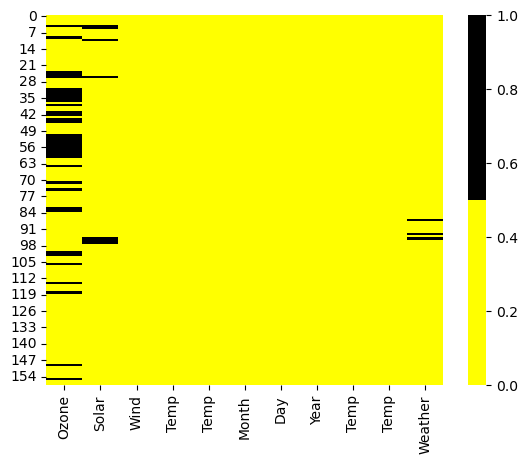

In [6]:
cols = data.columns
colors = ['yellow','black']
sns.heatmap(data[cols].isnull(),cmap= sns.color_palette(colors),cbar = True)

In [7]:
val_ozone = data['Ozone'].mean().round(3)
print(val_ozone)

41.583


In [8]:
val_solar = data['Solar'].median()
print(val_solar)

197.0


In [9]:
data['Ozone'] = data['Ozone'].fillna(val_ozone)
data['Solar'] = data['Solar'].fillna(val_solar)

In [10]:
data.head()

,Ozone,Solar,Wind,Temp,Month,Day,Year,Temp,Weather
0,41.000,190.0,7.4,67,5,1,2010,67,S
1,36.000,118.0,8.0,72,5,2,2010,72,C
2,12.000,149.0,12.6,74,5,3,2010,74,PS
3,18.000,313.0,11.5,62,5,4,2010,62,S
4,41.583,197.0,14.3,56,5,5,2010,56,S


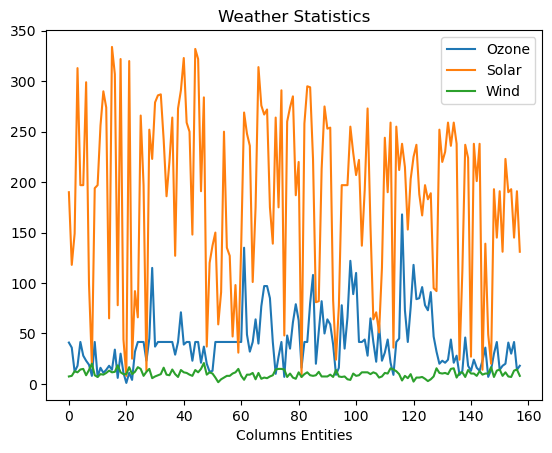

In [11]:
plt.plot(data['Ozone'])
plt.plot(data['Solar'])
plt.plot(data['Wind'])

plt.legend(data.columns)
plt.xlabel("Columns Entities")
plt.title("Weather Statistics")
plt.show()


In [12]:
data.head()

,Ozone,Solar,Wind,Temp,Month,Day,Year,Temp,Weather
0,41.000,190.0,7.4,67,5,1,2010,67,S
1,36.000,118.0,8.0,72,5,2,2010,72,C
2,12.000,149.0,12.6,74,5,3,2010,74,PS
3,18.000,313.0,11.5,62,5,4,2010,62,S
4,41.583,197.0,14.3,56,5,5,2010,56,S


In [13]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
data['Weather'][2] = np.nan
mode = data['Weather'].mode()
for i in mode:
    val = i
mode1 = val
data['Weather'] = data['Weather'].fillna(mode1)
data.isnull().sum()

Ozone      0
Solar      0
Wind       0
Temp       0
Month      0
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

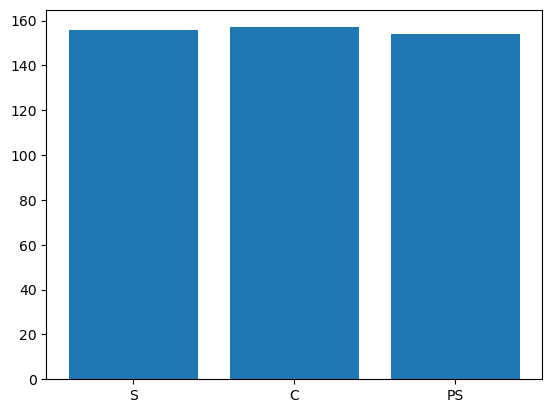

In [15]:
plt.bar(data['Weather'],data.index)
plt.show()

In [16]:
data

,Ozone,Solar,Wind,Temp,Month,Day,Year,Temp,Weather
0,41.000,190.0,7.4,67,5,1,2010,67,S
1,36.000,118.0,8.0,72,5,2,2010,72,C
2,12.000,149.0,12.6,74,5,3,2010,74,S
3,18.000,313.0,11.5,62,5,4,2010,62,S
4,41.583,197.0,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
153,41.000,190.0,7.4,67,5,1,2010,67,C
154,30.000,193.0,6.9,70,9,26,2010,70,PS
155,41.583,145.0,13.2,77,9,27,2010,77,S
156,14.000,191.0,14.3,75,9,28,2010,75,S


In [17]:
data['Weather'][0] = np.nan
data.head()
data.isnull().sum()

Ozone      0
Solar      0
Wind       0
Temp       0
Month      0
Day        0
Year       0
Temp       0
Weather    1
dtype: int64

In [18]:
mode  = data['Weather'].mode()[0]
data['Weather'] = data['Weather'].fillna(mode)
data.head()
print(data.isnull().sum())

print(data['Weather'].value_counts())

Ozone      0
Solar      0
Wind       0
Temp       0
Month      0
Day        0
Year       0
Temp       0
Weather    0
dtype: int64
Weather
S     63
C     49
PS    46
Name: count, dtype: int64


In [41]:
data.reset_index()

,index,Ozone,Solar,Wind,Temp,Month,Day,Year,Temp,Weather
0,0,41.000,190.0,7.4,67,5,1,2010,67,S
1,1,36.000,118.0,8.0,72,5,2,2010,72,C
2,2,12.000,149.0,12.6,74,5,3,2010,74,S
3,3,18.000,313.0,11.5,62,5,4,2010,62,S
4,4,41.583,197.0,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...,...
153,153,41.000,190.0,7.4,67,5,1,2010,67,C
154,154,30.000,193.0,6.9,70,9,26,2010,70,PS
155,155,41.583,145.0,13.2,77,9,27,2010,77,S
156,156,14.000,191.0,14.3,75,9,28,2010,75,S


In [43]:
data.tail(10)

,Ozone,Solar,Wind,Temp,Month,Day,Year,Temp,Weather
148,30.000,193.0,6.9,70,9,26,2010,70,C
149,41.583,145.0,13.2,77,9,27,2010,77,PS
150,14.000,191.0,14.3,75,9,28,2010,75,S
151,18.000,131.0,8.0,76,9,29,2010,76,PS
152,20.000,223.0,11.5,68,9,30,2010,68,S
153,41.000,190.0,7.4,67,5,1,2010,67,C
154,30.000,193.0,6.9,70,9,26,2010,70,PS
155,41.583,145.0,13.2,77,9,27,2010,77,S
156,14.000,191.0,14.3,75,9,28,2010,75,S
157,18.000,131.0,8.0,76,9,29,2010,76,C


In [45]:
data.drop(156, axis = 0)

,Ozone,Solar,Wind,Temp,Month,Day,Year,Temp,Weather
0,41.000,190.0,7.4,67,5,1,2010,67,S
1,36.000,118.0,8.0,72,5,2,2010,72,C
2,12.000,149.0,12.6,74,5,3,2010,74,S
3,18.000,313.0,11.5,62,5,4,2010,62,S
4,41.583,197.0,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
152,20.000,223.0,11.5,68,9,30,2010,68,S
153,41.000,190.0,7.4,67,5,1,2010,67,C
154,30.000,193.0,6.9,70,9,26,2010,70,PS
155,41.583,145.0,13.2,77,9,27,2010,77,S


In [49]:
data.reset_index(drop = True)

,Ozone,Solar,Wind,Temp,Month,Day,Year,Temp,Weather
0,41.000,190.0,7.4,67,5,1,2010,67,S
1,36.000,118.0,8.0,72,5,2,2010,72,C
2,12.000,149.0,12.6,74,5,3,2010,74,S
3,18.000,313.0,11.5,62,5,4,2010,62,S
4,41.583,197.0,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
153,41.000,190.0,7.4,67,5,1,2010,67,C
154,30.000,193.0,6.9,70,9,26,2010,70,PS
155,41.583,145.0,13.2,77,9,27,2010,77,S
156,14.000,191.0,14.3,75,9,28,2010,75,S


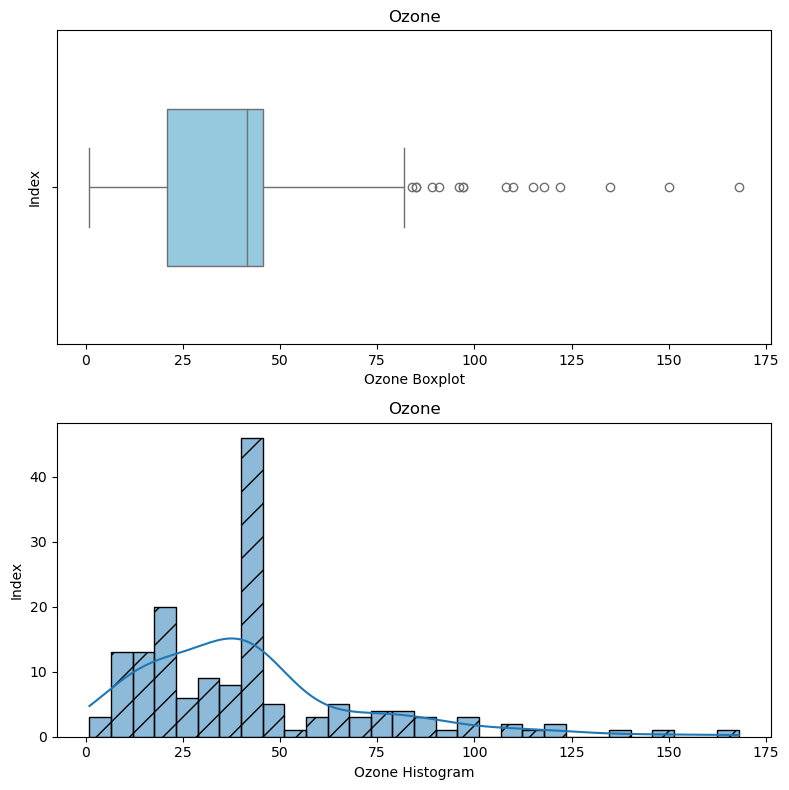

In [118]:
fig , axes = plt.subplots(2,1,figsize = (8,8))

sns.boxplot(data['Ozone'],ax = axes[0],color = 'skyblue',width = 0.5,orient = 'h')
axes[0].set_xlabel('Ozone Boxplot')
axes[0].set_ylabel('Index')
axes[0].set_title('Ozone')

sns.histplot(data['Ozone'],ax = axes[1],kde = True,bins = 30,hatch = '/')
axes[1].set_xlabel('Ozone Histogram')
axes[1].set_ylabel('Index')
axes[1].set_title('Ozone')


plt.tight_layout()
plt.show()

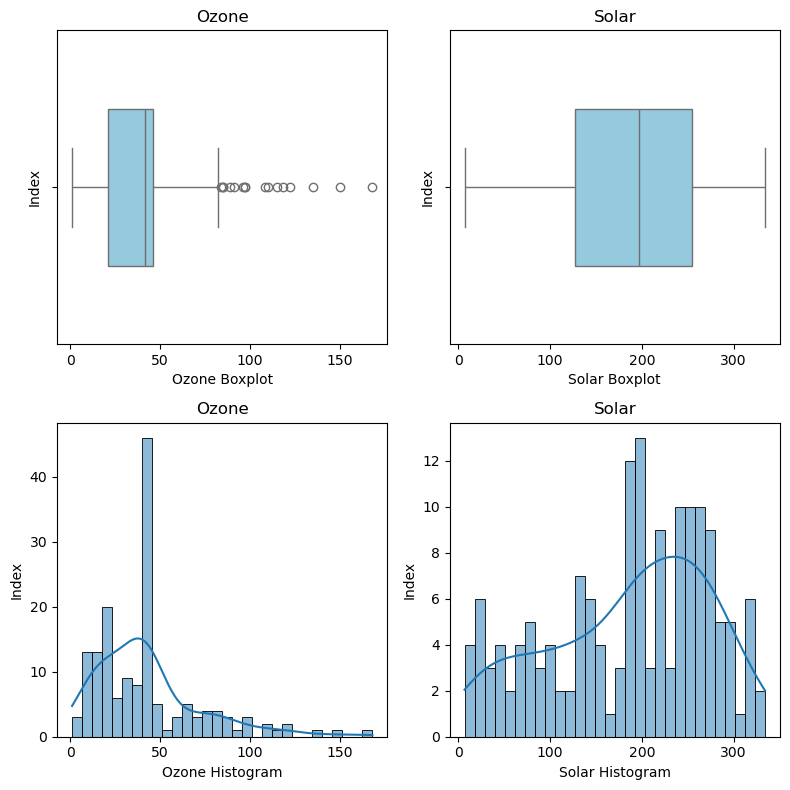

In [120]:
fig , axes = plt.subplots(2,2,figsize = (8,8))

sns.boxplot(data['Ozone'],ax = axes[0][0],color = 'skyblue',width = 0.5,orient = 'h')
axes[0][0].set_xlabel('Ozone Boxplot')
axes[0][0].set_ylabel('Index')
axes[0][0].set_title('Ozone')

sns.histplot(data['Ozone'],ax = axes[1][0],kde = True,bins = 30)
axes[1][0].set_xlabel('Ozone Histogram')
axes[1][0].set_ylabel('Index')
axes[1][0].set_title('Ozone')

sns.boxplot(data['Solar'],ax = axes[0][1],color = 'skyblue',width = 0.5,orient = 'h')
axes[0][1].set_xlabel('Solar Boxplot')
axes[0][1].set_ylabel('Index')
axes[0][1].set_title('Solar')

sns.histplot(data['Solar'],ax = axes[1][1],kde = True,bins = 30)
axes[1][1].set_xlabel('Solar Histogram')
axes[1][1].set_ylabel('Index')
axes[1][1].set_title('Solar')


plt.tight_layout()
plt.show()

In [ ]:
sns.violinplot(data['Ozone'])
plt.show()

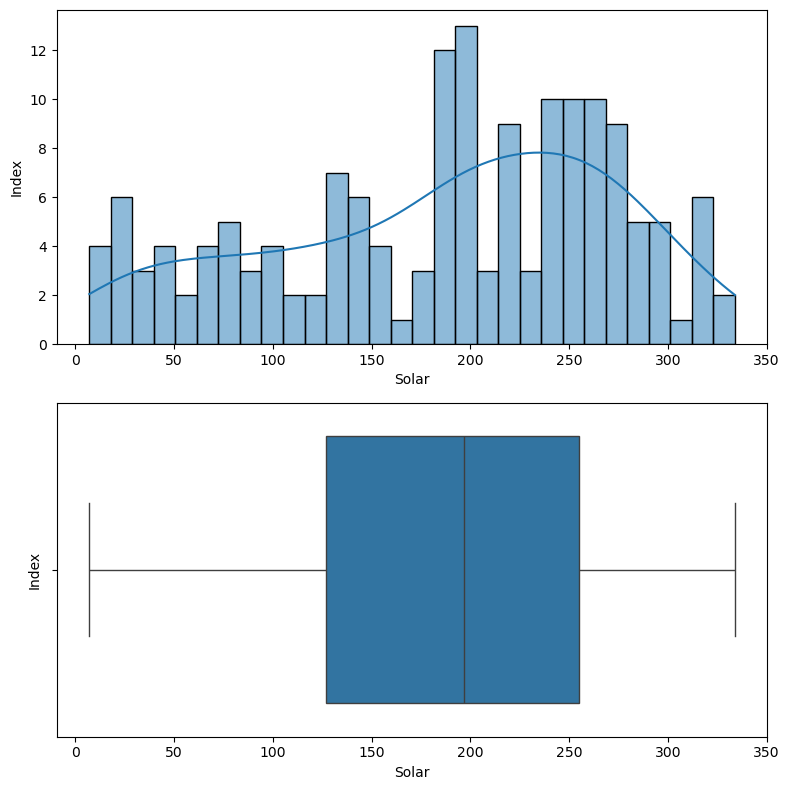

In [126]:
fig , ax = plt.subplots(2,1,figsize = (8,8))
sns.histplot(data['Solar'],bins = 30,kde = True,ax = ax[0])
ax[0].set_xlabel('Solar')
ax[0].set_ylabel('Index')

sns.boxplot(data['Solar'], orient = 'h',ax = ax[1])
ax[1].set_xlabel('Solar')
ax[1].set_ylabel('Index')

plt.tight_layout()
plt.show()

### Observations
##### Histogram is slightly left skewed for the solar cell
##### No Outliers visible in the boxplot
